# Excercise 7
This excercise had two main purposes: study the autocorrelation of data to make a clever choice for the number of blocks in data blocking and use a Monte Carlo approach to solve the same problem we encountered in Lecture 4 (Molecular Dynamics). To do all this, a lot of Python scripting was required so this Notebook is going to be a little more code-crowded than usual. With regard to the C++ part of the code, we had to modify an existing one to spit out data to be analyzed in Python and to calculate the Radial Distribution Function ($g(r)$), which was also implemented in Molecular Dynamics code for comparison.

In [53]:
#Imports, global variables and useful functions
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

def AutoC(f, t):
    x=0.
    x_t=0.
    x_2=0.
    xx_t=0.
    j = len(f)-t
    for i in range(j):
        x+=f[i]
        x_t+=f[i+t]
        x_2+=f[i]**2
        xx_t+=f[i]*f[i+t]
    xx_t/=j
    x/=j
    x_2/=j
    x_t/=j
    return (xx_t-x_t*x)/(x_2-x**2)

def expo(x,a,b,c):
    return a*np.exp(-b*x)+c

def datablocking(M,L,k):
    ind=0
    Error = np.zeros(len(L))
    for block_size in L:
        block_number = int(M/block_size)
        ave = np.zeros(block_number)
        #error = np.zeros(block_number)
        for iblock in range(block_number):
            for istep in range(block_size):
                ave[iblock]+=k[iblock*block_size+istep]
            ave[iblock]/=block_number
        for i in range(block_number):
            global_ave = 0.
            global_ave_2 = 0.
            for j in range(i+1):
                global_ave += ave[j]
                global_ave_2 += ave[j]**2
            global_ave /=(i+1)
            global_ave_2 /=(i+1)
            error = ((global_ave_2-global_ave**2))**0.5
            Error[ind]=error/np.sqrt(block_size)
        ind+=1
    return Error

plt.rcParams['figure.figsize'] = [16,9]
k_b = 8.61*10**-5
k_bj = 1.38*10**-23
sigma_arg=0.34*10**-9
epsilon_arg=120*k_b
sigma_kry = 0.364*10**-9
epsilon_kry = 164*k_b
t_arg = 120
t_kry = 164
p_arg = t_arg*k_bj*10**-5/(sigma_arg**3)
p_kry = t_kry*k_bj*10**-5/(sigma_kry**3)
L=[10, 20, 25, 50, 100, 200, 250, 500, 1000, 2000, 2500, 5000]


## Excercise 7.1
In this section we studied autocorrelation and error for both Energy (per particle) and Pressure in the 3 thermodynamic states stated in the lecture notebook. In the plots below one can clearly see that autocorrelation can be fitted with a decreasing exponential and that it falls to zero faster as temperature increases. Error increases with block size as we expected, since error in data blocking is intrinsecally bond to the number of blocks, hence their size.

### Solid Phase

----------Energy Autocorrelation Parameters----------
Fit with a*e^(-b*x)+c
a = 0.83545331474276 ; error =  0.0002522573387660197
b = 0.0944439870213636 ; error =  8.461022457433512e-06
c = 0.02934084698972844 ; error =  7.444210815733119e-06

----------Pressure Autocorrelation Parameters----------
Fit with a*e^(-b*x)+c
a = 0.8387398799193474 ; error =  0.00025625404858730717
b = 0.09767507353082247 ; error =  9.081390564678174e-06
c = 0.030618509068908013 ; error =  7.261762027065086e-06


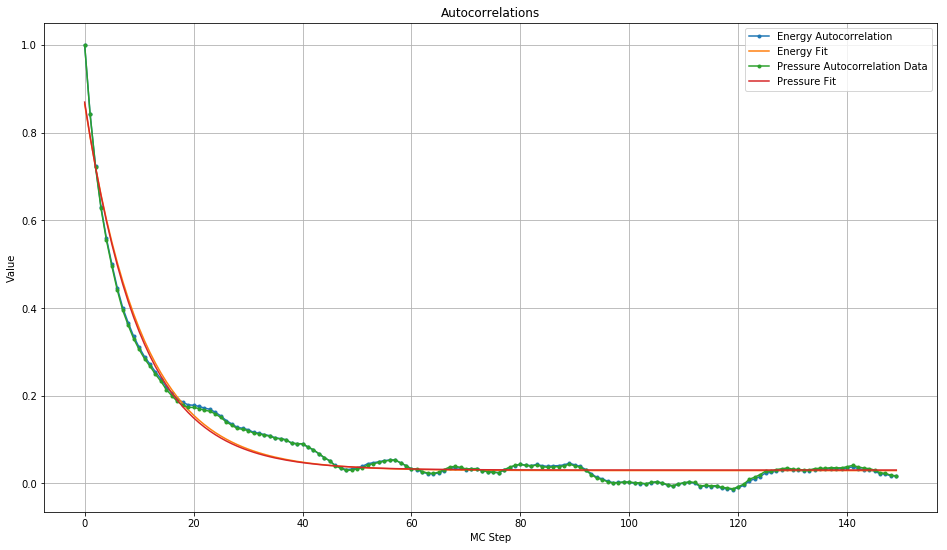

In [54]:
#Energy Autocorellation
k=np.loadtxt("MonteCarlo_NVT/e_inst_s.dat")

ac=[]

n=150

x = np.arange(0,n,1)
for i in range(n):
    ac.append(AutoC(k,i))
plt.plot(x,ac,label="Energy Autocorrelation", marker=".")

param, pvar = opt.curve_fit(expo,x,ac)

plt.plot(x, expo(x, *param), label="Energy Fit");

#Data blocking
M=len(k)
Error_e = datablocking(M,L,k)


print("----------Energy Autocorrelation Parameters----------")
print("Fit with a*e^(-b*x)+c")
print("a =", param[0], "; error = ", pvar[0][0])
print("b =", param[1], "; error = ", pvar[1][1])
print("c =", param[2], "; error = ", pvar[2][2])

k=np.loadtxt("MonteCarlo_NVT/p_inst_s.dat")

ac=[]

n=150

x = np.arange(0,n,1)
for i in range(n):
    ac.append(AutoC(k,i))
plt.plot(x,ac,label="Pressure Autocorrelation Data", marker=".")

param, pvar = opt.curve_fit(expo,x,ac)

plt.plot(x, expo(x, *param), label="Pressure Fit");

#Data blocking
M=len(k)

Error_p = datablocking(M,L,k)

print()
print("----------Pressure Autocorrelation Parameters----------")
print("Fit with a*e^(-b*x)+c")
print("a =", param[0], "; error = ", pvar[0][0])
print("b =", param[1], "; error = ", pvar[1][1])
print("c =", param[2], "; error = ", pvar[2][2])

plt.legend()
plt.grid(1)
plt.title("Autocorrelations")
plt.xlabel("MC Step")
plt.ylabel("Value")

plt.show()

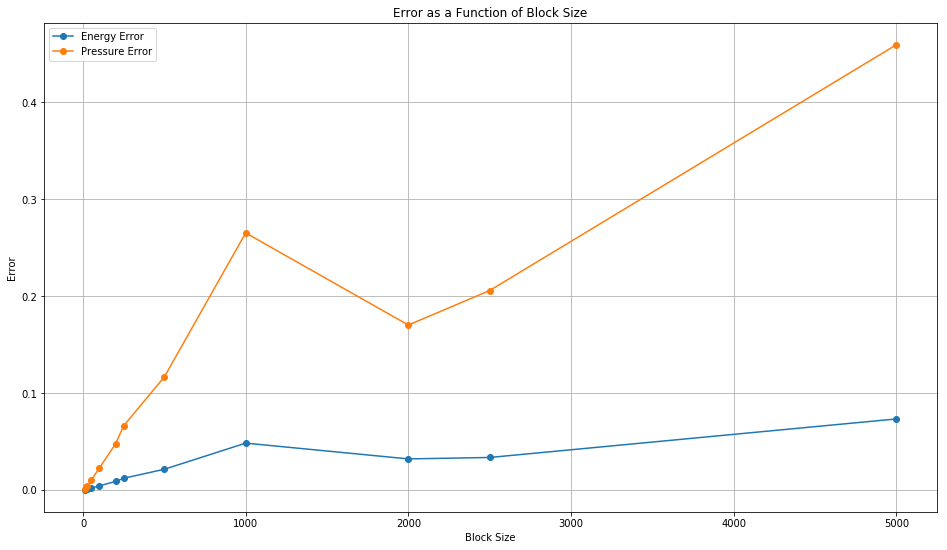

In [55]:
plt.plot(L,Error_e, marker="o", label="Energy Error")
plt.plot(L,Error_p, marker="o", label="Pressure Error")
plt.legend()
plt.grid(1)
plt.title("Error as a Function of Block Size")
plt.xlabel("Block Size")
plt.ylabel("Error")
plt.show()

### Liquid Phase

----------Energy Autocorrelation Parameters----------
Fit with a*e^(-b*x)+c
a = 0.5785336031350059 ; error =  0.00025522467333346897
b = 0.025479455301765642 ; error =  2.2959709397778e-06
c = 0.00019420926575290374 ; error =  4.843301685422387e-05

----------Pressure Autocorrelation Parameters----------
Fit with a*e^(-b*x)+c
a = 0.6479584153972499 ; error =  0.00017604397398167845
b = 0.01913137282826526 ; error =  1.0686004210583758e-06
c = -0.027064048100520554 ; error =  7.935838196928115e-05


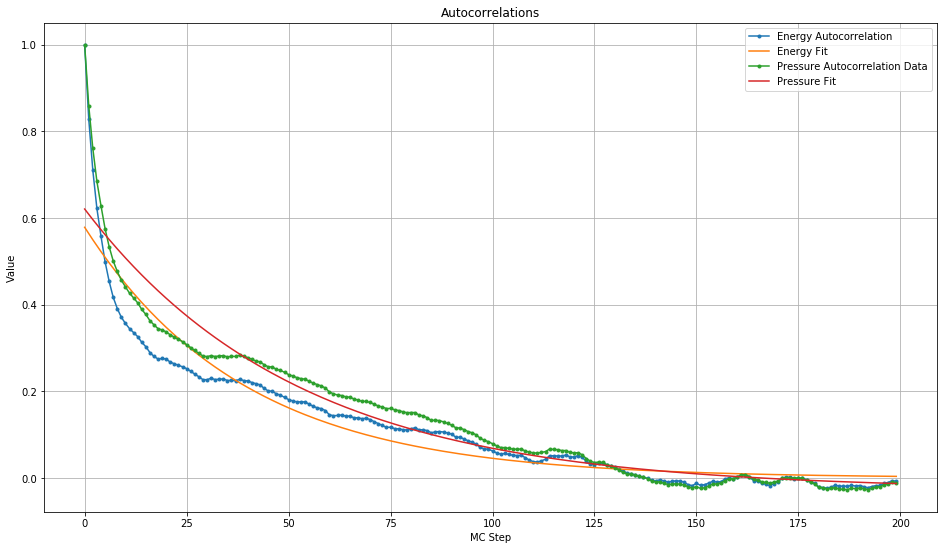

In [56]:
#Energy Autocorellation
k=np.loadtxt("MonteCarlo_NVT/e_inst_l.dat")

ac=[]

n=200

x = np.arange(0,n,1)
for i in range(n):
    ac.append(AutoC(k,i))
plt.plot(x,ac,label="Energy Autocorrelation", marker=".")

param, pvar = opt.curve_fit(expo,x,ac)

plt.plot(x, expo(x, *param), label="Energy Fit");

#Data blocking
M=len(k)

Error_e = datablocking(M,L,k)


print("----------Energy Autocorrelation Parameters----------")
print("Fit with a*e^(-b*x)+c")
print("a =", param[0], "; error = ", pvar[0][0])
print("b =", param[1], "; error = ", pvar[1][1])
print("c =", param[2], "; error = ", pvar[2][2])

k=np.loadtxt("MonteCarlo_NVT/p_inst_l.dat")

ac=[]

x = np.arange(0,n,1)
for i in range(n):
    ac.append(AutoC(k,i))
plt.plot(x,ac,label="Pressure Autocorrelation Data", marker=".")

param, pvar = opt.curve_fit(expo,x,ac)

plt.plot(x, expo(x, *param), label="Pressure Fit");

#Data blocking
M=len(k)

Error_p = datablocking(M,L,k)

print()
print("----------Pressure Autocorrelation Parameters----------")
print("Fit with a*e^(-b*x)+c")
print("a =", param[0], "; error = ", pvar[0][0])
print("b =", param[1], "; error = ", pvar[1][1])
print("c =", param[2], "; error = ", pvar[2][2])

plt.legend()
plt.grid(1)
plt.title("Autocorrelations")
plt.xlabel("MC Step")
plt.ylabel("Value")

plt.show()

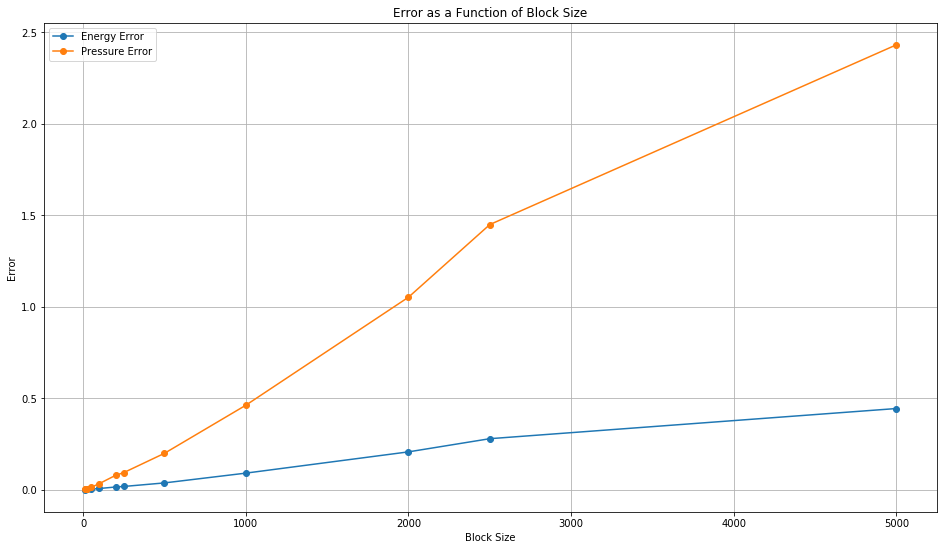

In [57]:
plt.plot(L,Error_e, marker="o", label="Energy Error")
plt.plot(L,Error_p, marker="o", label="Pressure Error")
plt.legend()
plt.grid(1)
plt.title("Error as a Function of Block Size")
plt.xlabel("Block Size")
plt.ylabel("Error")
plt.show()

### Gas Phase

----------Energy Autocorrelation Parameters----------
Fit with a*e^(-b*x)+c
a = 0.9195838900925669 ; error =  0.00030461347205011207
b = 0.2764142325589789 ; error =  7.831890053733725e-05
c = 0.008061324424249615 ; error =  6.014397764535676e-06

----------Pressure Autocorrelation Parameters----------
Fit with a*e^(-b*x)+c
a = 0.9970998463220635 ; error =  0.00010918317993349684
b = 1.1420770284976571 ; error =  0.0007994722329627736
c = 0.0004064760557105469 ; error =  1.2690114052327528e-06


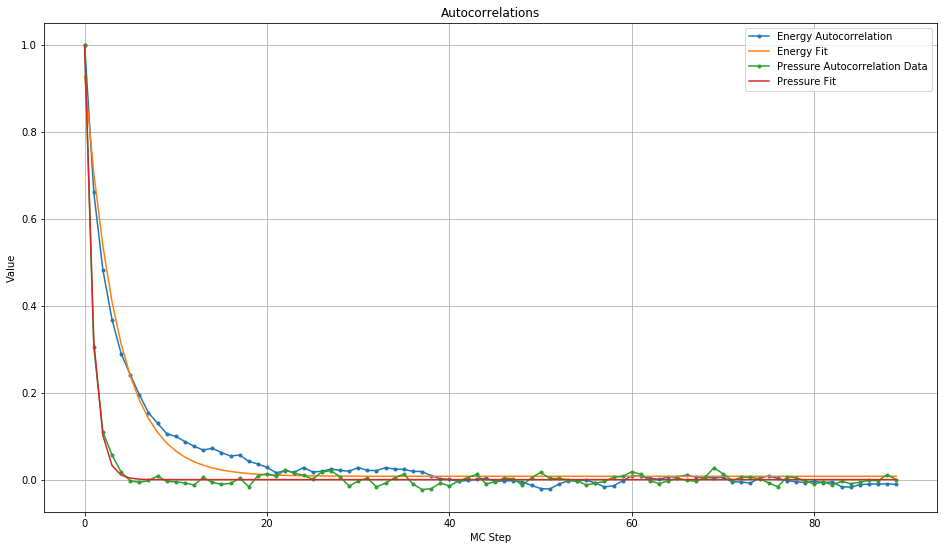

In [58]:
#Energy Autocorellation
k=np.loadtxt("MonteCarlo_NVT/e_inst_g.dat")

ac=[]

n=90

x = np.arange(0,n,1)
for i in range(n):
    ac.append(AutoC(k,i))
plt.plot(x,ac,label="Energy Autocorrelation", marker=".")

param, pvar = opt.curve_fit(expo,x,ac)

plt.plot(x, expo(x, *param), label="Energy Fit");

#Data blocking
M=len(k)
Error_e = datablocking(M,L,k)


print("----------Energy Autocorrelation Parameters----------")
print("Fit with a*e^(-b*x)+c")
print("a =", param[0], "; error = ", pvar[0][0])
print("b =", param[1], "; error = ", pvar[1][1])
print("c =", param[2], "; error = ", pvar[2][2])

k=np.loadtxt("MonteCarlo_NVT/p_inst_g.dat")

ac=[]

x = np.arange(0,n,1)
for i in range(n):
    ac.append(AutoC(k,i))
plt.plot(x,ac,label="Pressure Autocorrelation Data", marker=".")

param, pvar = opt.curve_fit(expo,x,ac)

plt.plot(x, expo(x, *param), label="Pressure Fit");

#Data blocking
M=len(k)

Error_p = datablocking(M,L,k)

print()
print("----------Pressure Autocorrelation Parameters----------")
print("Fit with a*e^(-b*x)+c")
print("a =", param[0], "; error = ", pvar[0][0])
print("b =", param[1], "; error = ", pvar[1][1])
print("c =", param[2], "; error = ", pvar[2][2])

plt.legend()
plt.grid(1)
plt.title("Autocorrelations")
plt.xlabel("MC Step")
plt.ylabel("Value")

plt.show()

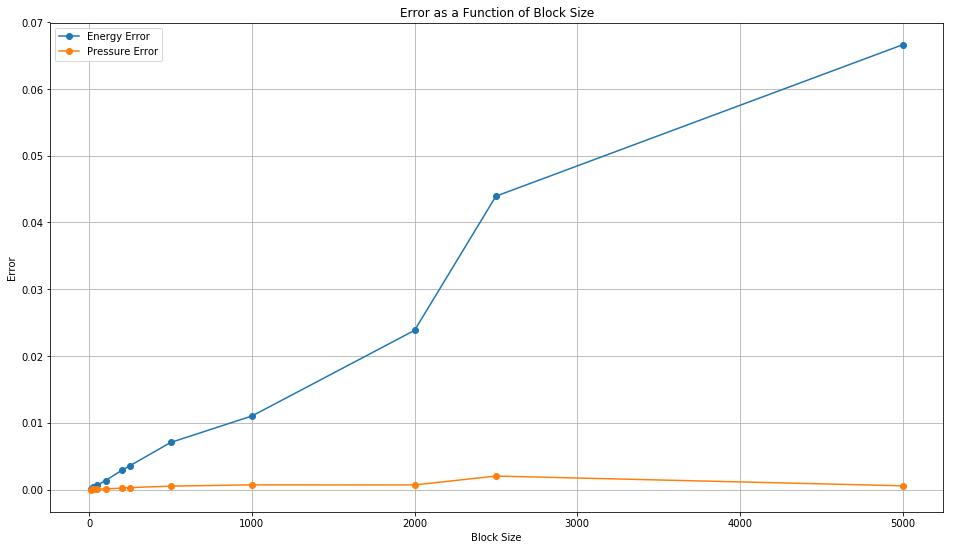

In [59]:
plt.plot(L,Error_e, marker="o", label="Energy Error")
plt.plot(L,Error_p, marker="o", label="Pressure Error")
plt.legend()
plt.grid(1)
plt.title("Error as a Function of Block Size")
plt.xlabel("Block Size")
plt.ylabel("Error")
plt.show()

## Excercise 7.4
This section is very important because it compares two ways of solving a problem: Molecular Dynamics and Monte Carlo. In the graphs below we compare the Radial Distribution Function obtained through those codes. They are comparable and within margin of error. We also show values of U/N and P, computed via data blocking in the Monte Carlo code, for both Argon and Krypton. All the values have then been converted into physical units ([eV] for Energies and [atm] for Pressures).   

### Solid Phase

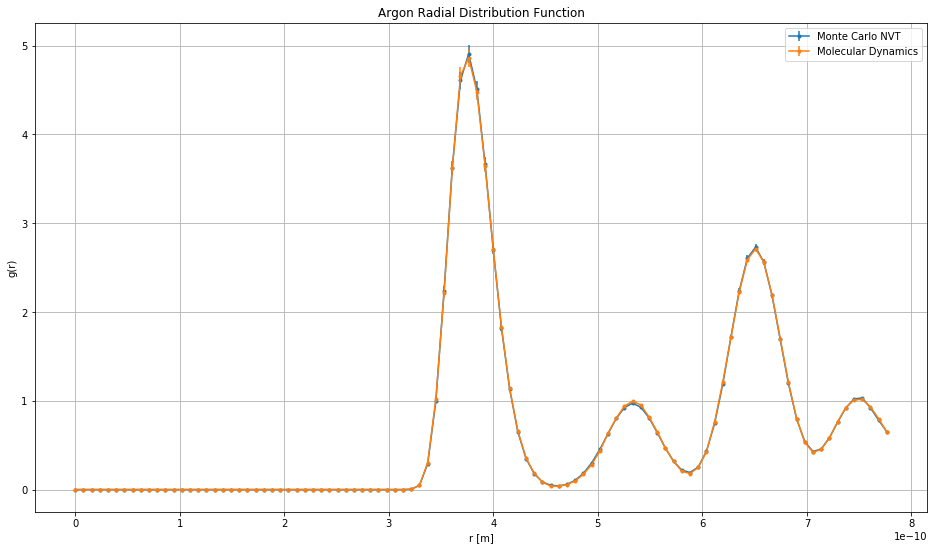

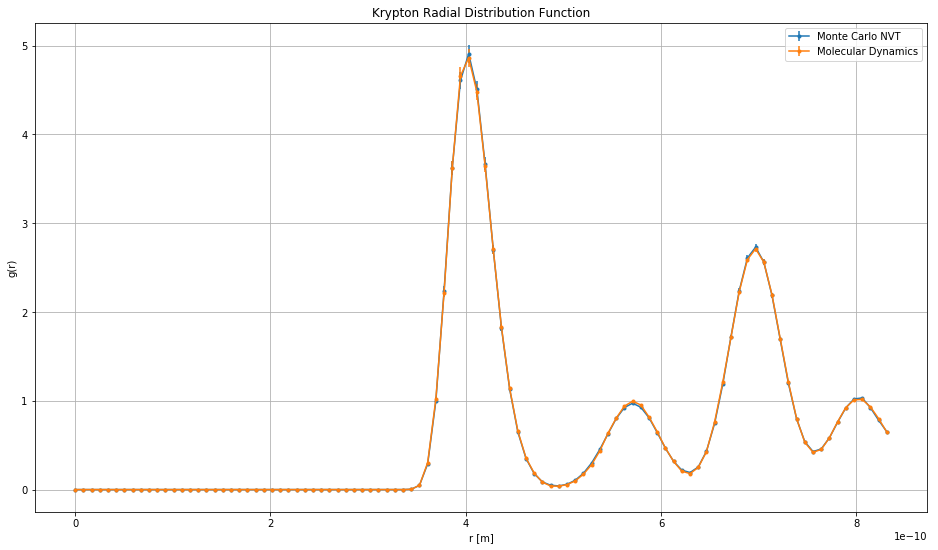

In [60]:
#Argon
k=np.loadtxt("MonteCarlo_NVT/output.gave.0s")
x=k[:,0]*sigma_arg
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Monte Carlo NVT")

k=np.loadtxt("MolDyn/output.gave.0s")
x=k[:,0]*sigma_arg
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Molecular Dynamics")
plt.title("Argon Radial Distribution Function")
plt.xlabel("r [m]")
plt.ylabel("g(r)")
plt.legend()
plt.grid()
plt.show()

#Krypton
k=np.loadtxt("MonteCarlo_NVT/output.gave.0s")
x=k[:,0]*sigma_kry
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Monte Carlo NVT")

k=np.loadtxt("MolDyn/output.gave.0s")
x=k[:,0]*sigma_kry
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Molecular Dynamics")
plt.title("Krypton Radial Distribution Function")
plt.xlabel("r [m]")
plt.ylabel("g(r)")
plt.legend()
plt.grid()
plt.show()


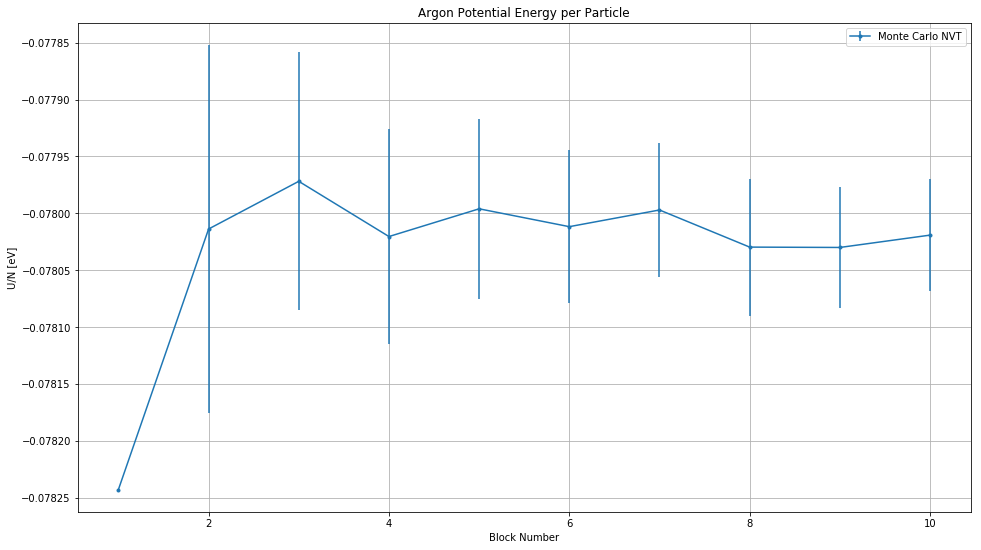

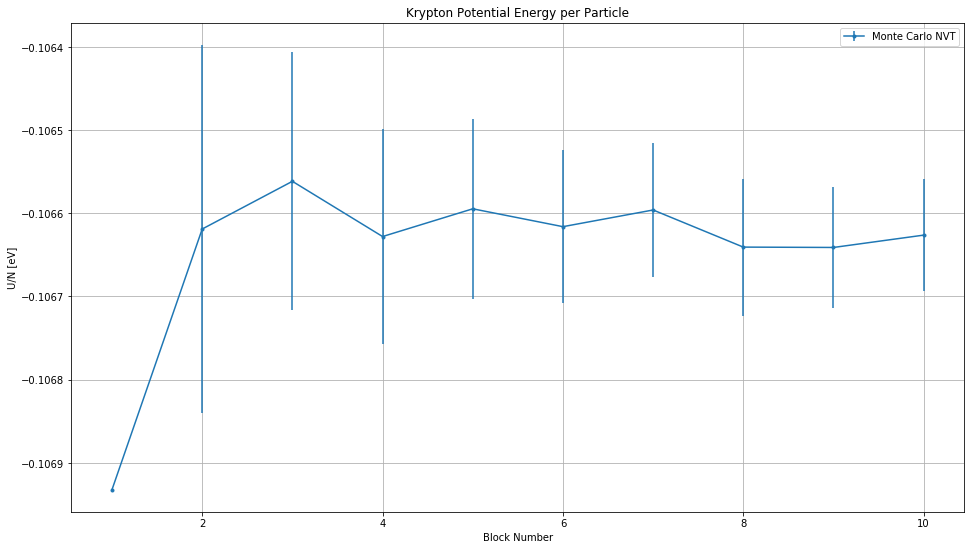

In [61]:
#Argon
k=np.loadtxt("MonteCarlo_NVT/output.epot.0s")
x=k[:,0]
y=k[:,2]*epsilon_arg
err=k[:,3]*epsilon_arg

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Argon Potential Energy per Particle")
plt.xlabel("Block Number")
plt.ylabel("U/N [eV]")
plt.grid()
plt.legend()
plt.show()

#Krypton
k=np.loadtxt("MonteCarlo_NVT/output.epot.0s")
x=k[:,0]
y=k[:,2]*epsilon_kry
err=k[:,3]*epsilon_kry

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Krypton Potential Energy per Particle")
plt.xlabel("Block Number")
plt.ylabel("U/N [eV]")
plt.grid()
plt.legend()
plt.show()

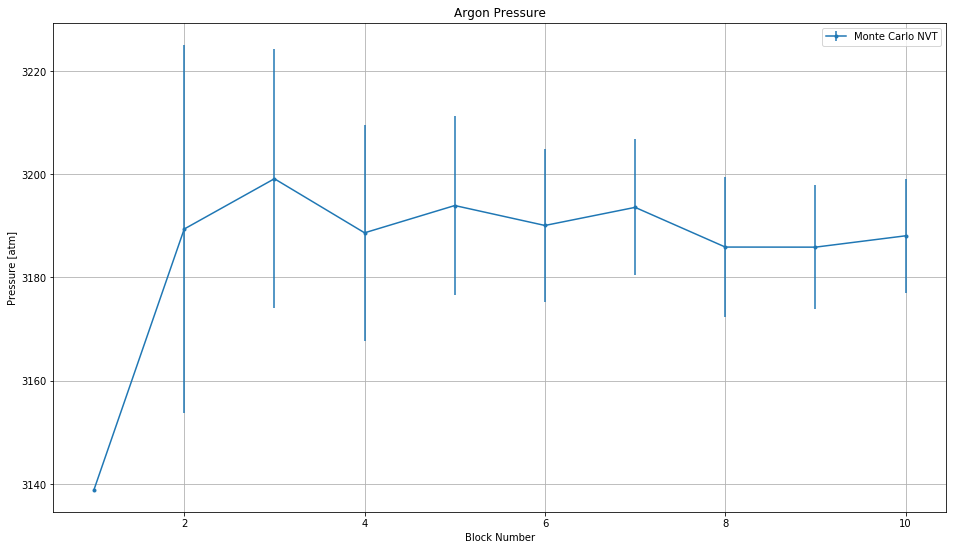

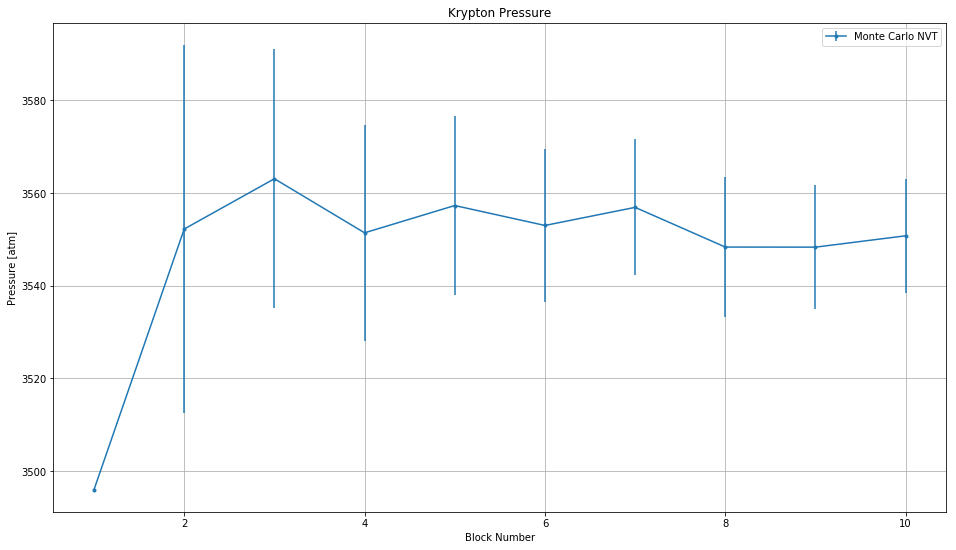

In [62]:
#Argon
k=np.loadtxt("MonteCarlo_NVT/output.pres.0s")
x=k[:,0]
y=k[:,2]*p_arg
err=k[:,3]*p_arg

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Argon Pressure")
plt.xlabel("Block Number")
plt.ylabel("Pressure [atm]")
plt.grid()
plt.legend()
plt.show()

#Krypton
k=np.loadtxt("MonteCarlo_NVT/output.pres.0s")
x=k[:,0]
y=k[:,2]*p_kry
err=k[:,3]*p_kry

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Krypton Pressure")
plt.xlabel("Block Number")
plt.ylabel("Pressure [atm]")
plt.grid()
plt.legend()
plt.show()

### Liquid Phase

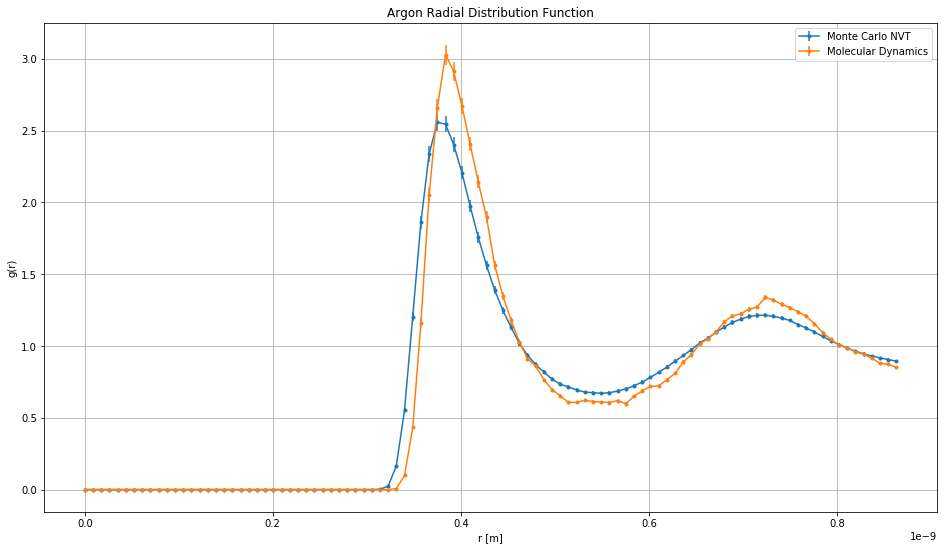

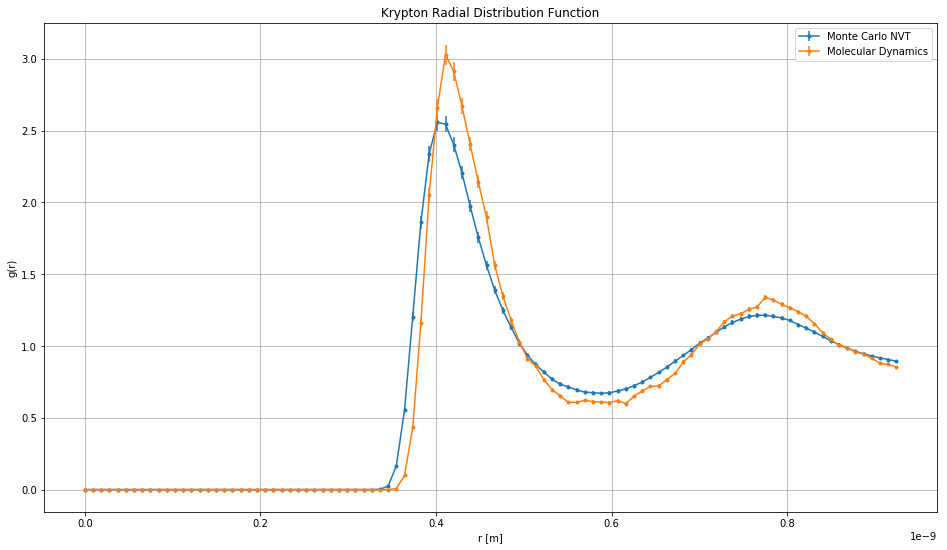

In [63]:
#Argon
k=np.loadtxt("MonteCarlo_NVT/output.gave.0l")
x=k[:,0]*sigma_arg
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Monte Carlo NVT")

k=np.loadtxt("MolDyn/output.gave.0l")
x=k[:,0]*sigma_arg
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Molecular Dynamics")
plt.title("Argon Radial Distribution Function")
plt.xlabel("r [m]")
plt.ylabel("g(r)")
plt.legend()
plt.grid()
plt.show()

#Krypton
k=np.loadtxt("MonteCarlo_NVT/output.gave.0l")
x=k[:,0]*sigma_kry
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Monte Carlo NVT")

k=np.loadtxt("MolDyn/output.gave.0l")
x=k[:,0]*sigma_kry
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Molecular Dynamics")
plt.title("Krypton Radial Distribution Function")
plt.xlabel("r [m]")
plt.ylabel("g(r)")
plt.legend()
plt.grid()
plt.show()


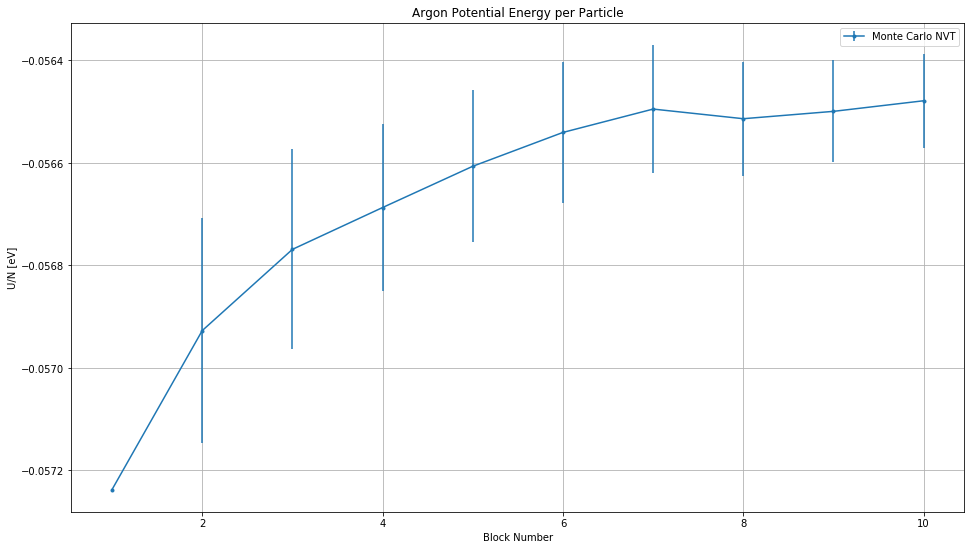

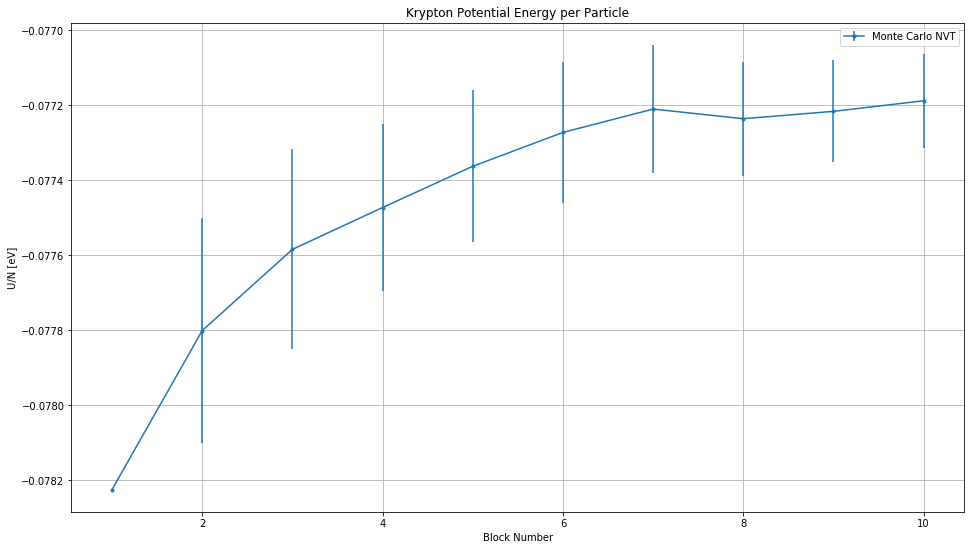

In [64]:
#Argon
k=np.loadtxt("MonteCarlo_NVT/output.epot.0l")
x=k[:,0]
y=k[:,2]*epsilon_arg
err=k[:,3]*epsilon_arg

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Argon Potential Energy per Particle")
plt.xlabel("Block Number")
plt.ylabel("U/N [eV]")
plt.grid()
plt.legend()
plt.show()

#Krypton
k=np.loadtxt("MonteCarlo_NVT/output.epot.0l")
x=k[:,0]
y=k[:,2]*epsilon_kry
err=k[:,3]*epsilon_kry

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Krypton Potential Energy per Particle")
plt.xlabel("Block Number")
plt.ylabel("U/N [eV]")
plt.grid()
plt.legend()
plt.show()

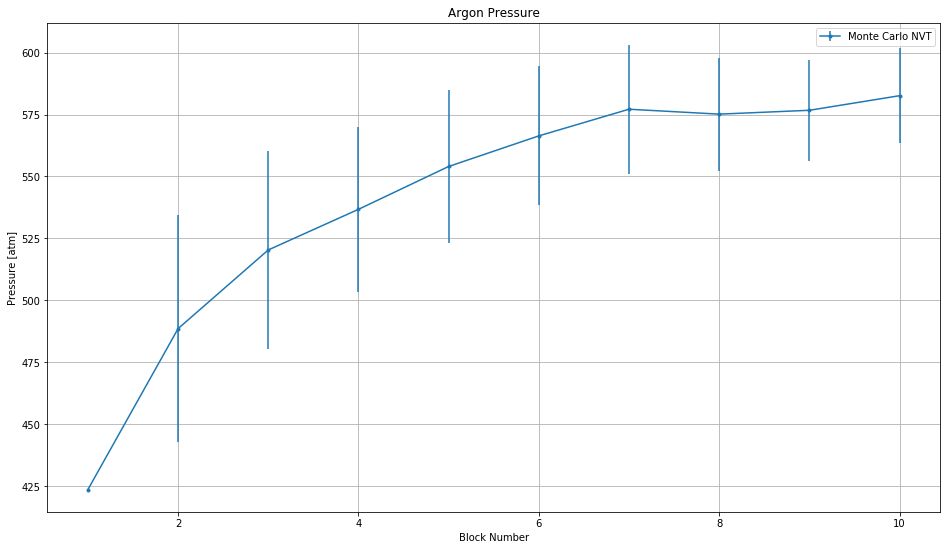

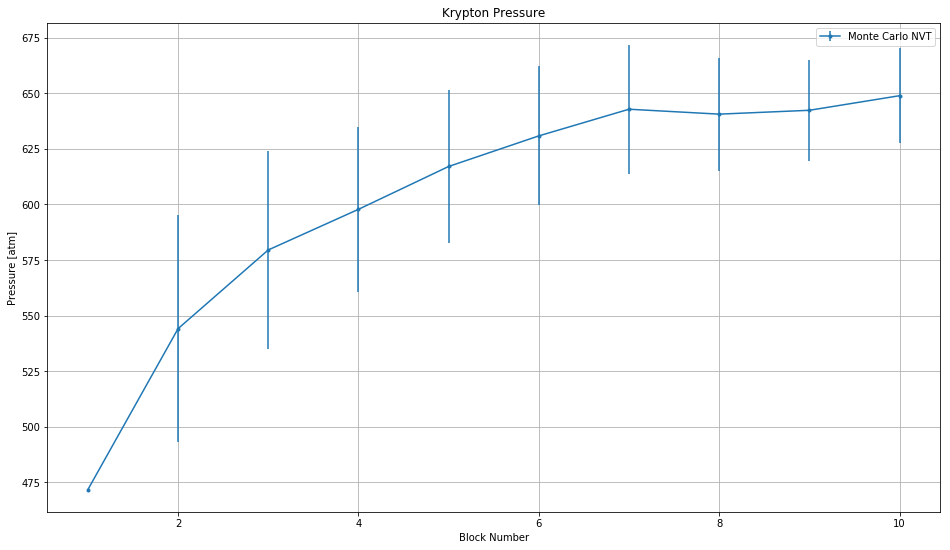

In [65]:
#Argon
k=np.loadtxt("MonteCarlo_NVT/output.pres.0l")
x=k[:,0]
y=k[:,2]*p_arg
err=k[:,3]*p_arg

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Argon Pressure")
plt.xlabel("Block Number")
plt.ylabel("Pressure [atm]")
plt.grid()
plt.legend()
plt.show()

#Krypton
k=np.loadtxt("MonteCarlo_NVT/output.pres.0l")
x=k[:,0]
y=k[:,2]*p_kry
err=k[:,3]*p_kry

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Krypton Pressure")
plt.xlabel("Block Number")
plt.ylabel("Pressure [atm]")
plt.grid()
plt.legend()
plt.show()

### Gas Phase

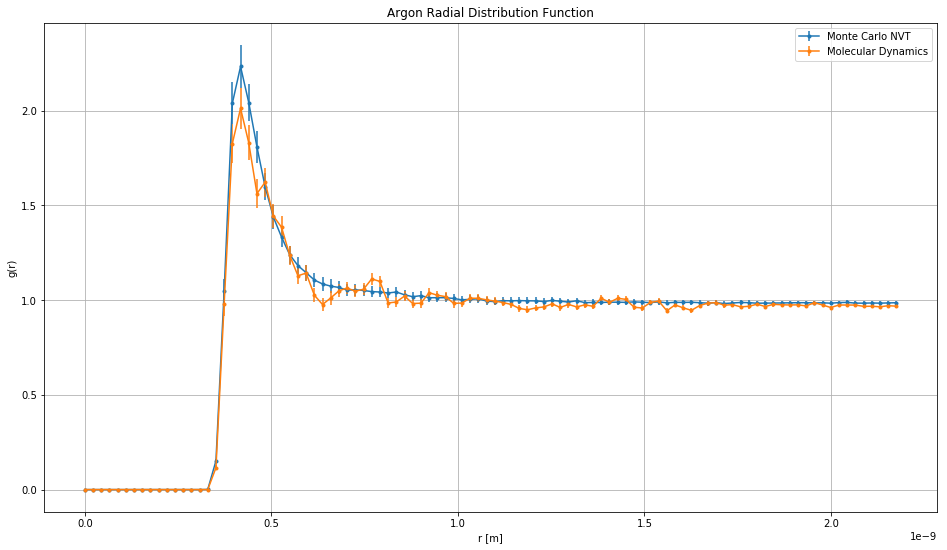

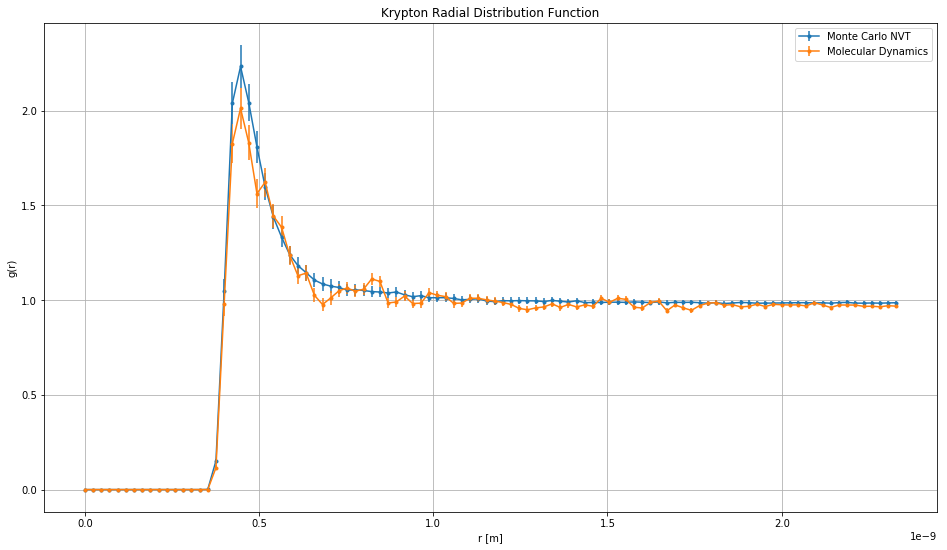

In [66]:
#Argon
k=np.loadtxt("MonteCarlo_NVT/output.gave.0g")
x=k[:,0]*sigma_arg
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Monte Carlo NVT")

k=np.loadtxt("MolDyn/output.gave.0g")
x=k[:,0]*sigma_arg
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Molecular Dynamics")
plt.title("Argon Radial Distribution Function")
plt.xlabel("r [m]")
plt.ylabel("g(r)")
plt.legend()
plt.grid()
plt.show()

#Krypton
k=np.loadtxt("MonteCarlo_NVT/output.gave.0g")
x=k[:,0]*sigma_kry
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Monte Carlo NVT")

k=np.loadtxt("MolDyn/output.gave.0g")
x=k[:,0]*sigma_kry
y=k[:,1]
err = k[:,2]

plt.errorbar(x,y, yerr=err, marker=".", label="Molecular Dynamics")
plt.title("Krypton Radial Distribution Function")
plt.xlabel("r [m]")
plt.ylabel("g(r)")
plt.legend()
plt.grid()
plt.show()


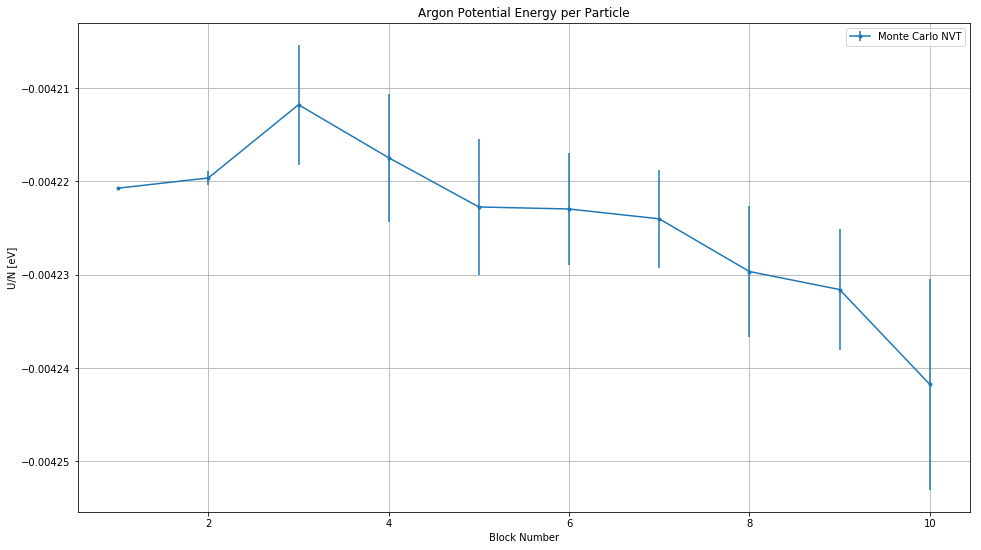

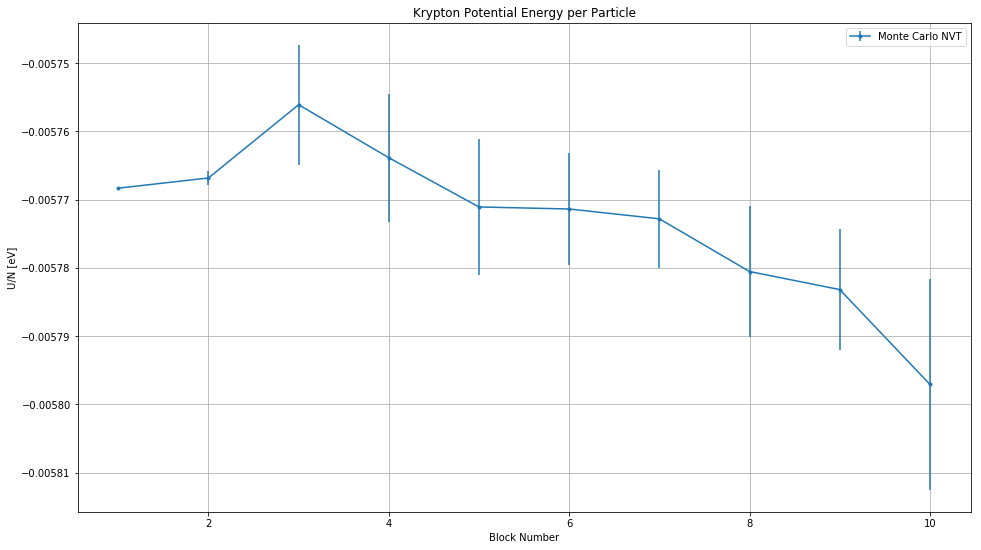

In [67]:
#Argon
k=np.loadtxt("MonteCarlo_NVT/output.epot.0g")
x=k[:,0]
y=k[:,2]*epsilon_arg
err=k[:,3]*epsilon_arg

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Argon Potential Energy per Particle")
plt.xlabel("Block Number")
plt.ylabel("U/N [eV]")
plt.grid()
plt.legend()
plt.show()

#Krypton
k=np.loadtxt("MonteCarlo_NVT/output.epot.0g")
x=k[:,0]
y=k[:,2]*epsilon_kry
err=k[:,3]*epsilon_kry

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Krypton Potential Energy per Particle")
plt.xlabel("Block Number")
plt.ylabel("U/N [eV]")
plt.grid()
plt.legend()
plt.show()

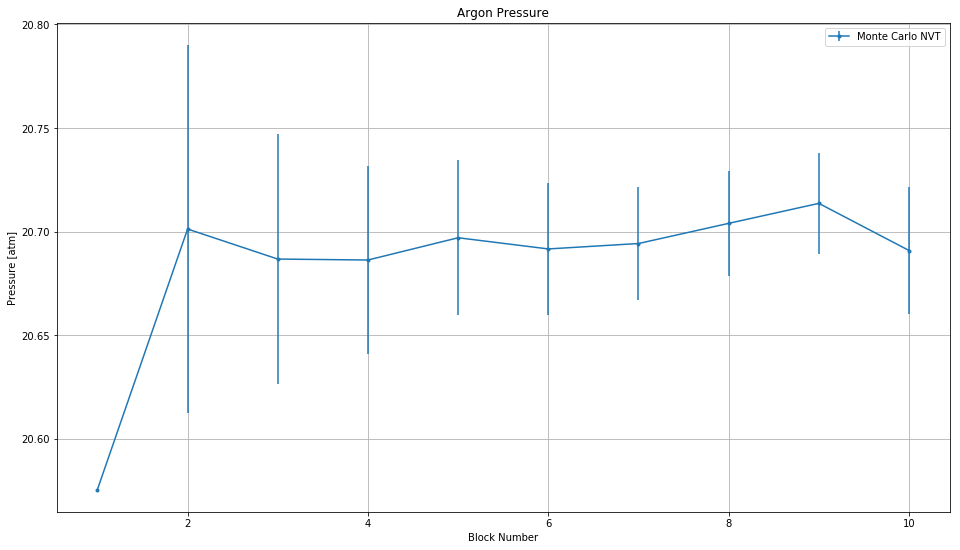

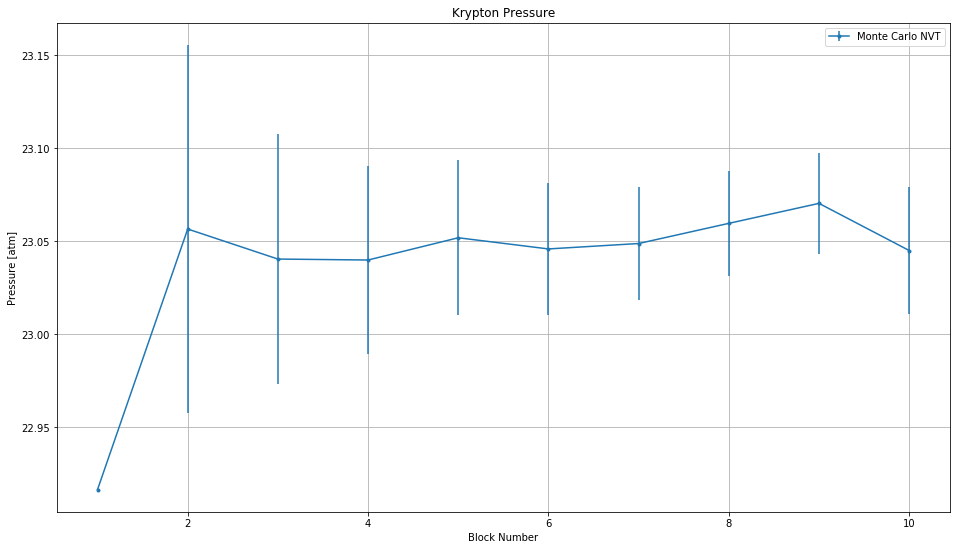

In [68]:
#Argon
k=np.loadtxt("MonteCarlo_NVT/output.pres.0g")
x=k[:,0]
y=k[:,2]*p_arg
err=k[:,3]*p_arg

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Argon Pressure")
plt.xlabel("Block Number")
plt.ylabel("Pressure [atm]")
plt.grid()
plt.legend()
plt.show()

#Krypton
k=np.loadtxt("MonteCarlo_NVT/output.pres.0g")
x=k[:,0]
y=k[:,2]*p_kry
err=k[:,3]*p_kry

plt.errorbar(x,y,yerr=err, label="Monte Carlo NVT", marker=".")
plt.title("Krypton Pressure")
plt.xlabel("Block Number")
plt.ylabel("Pressure [atm]")
plt.grid()
plt.legend()
plt.show()